In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
traindf: pd.DataFrame = pd.read_csv("data/ds3_train.csv")
display(traindf.head())
display(traindf["z"].value_counts())

,x_1,x_2,z
0,-0.664166,1.051539,-1
1,0.321250,2.966127,3
2,-0.078748,0.955693,-1
3,-0.036538,1.030159,-1
4,-1.553956,2.776952,-1


z
-1    980
 3      5
 0      5
 2      5
 1      5
Name: count, dtype: int64

In [12]:
unsupervised_set = traindf[traindf["z"] == -1][["x_1", "x_2"]]
supervised_set = traindf[traindf["z"] != -1]
print(f"unsupervised set: \n{unsupervised_set.head()}\n")
print(f"supervised set: \n{supervised_set.head()}\n")
unsupervised_features = unsupervised_set.to_numpy()
supervised_features = supervised_set[["x_1", "x_2"]].to_numpy()
supervised_labels = np.array(supervised_set[["z"]])
supervised_labels = supervised_labels.reshape((20,))

unsupervised set: 
        x_1       x_2
0 -0.664166  1.051539
2 -0.078748  0.955693
3 -0.036538  1.030159
4 -1.553956  2.776952
5 -1.546586  1.687299

supervised set: 
          x_1       x_2  z
1    0.321250  2.966127  3
31   0.041560 -0.013007  0
91  -0.118523  0.929570  2
100  1.842232 -0.021369  3
112  0.449580  0.601387  1



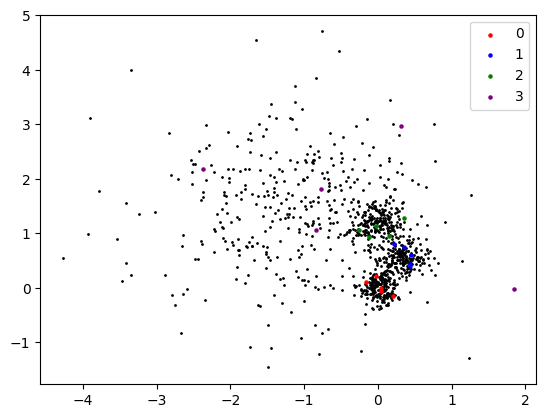

In [13]:
#plot the data
plt.scatter(unsupervised_features[:,0], unsupervised_features[:,1], s = 1, c = "black")
plt.scatter(supervised_features[supervised_labels == 0][:,0], supervised_features[supervised_labels == 0][:,1], s = 5, c = "red", label = "0")
plt.scatter(supervised_features[supervised_labels == 1][:,0], supervised_features[supervised_labels == 1][:,1], s = 5, c = "blue", label = "1")
plt.scatter(supervised_features[supervised_labels == 2][:,0], supervised_features[supervised_labels == 2][:,1], s = 5, c = "green", label = "2")
plt.scatter(supervised_features[supervised_labels == 3][:,0], supervised_features[supervised_labels == 3][:,1], s = 5, c = "purple", label = "3")
plt.legend()
plt.show()

it's clear that the red blue and green are small gaussians while the purple is an overarching large and spread out gaussian which contains red, blue and green (assuming they are of course gaussians)

In [ ]:
combined_features = np.vstack((unsupervised_features, supervised_features))

[[-0.66416609  1.05153883]
 [-0.07874786  0.95569336]
 [-0.0365385   1.03015864]
 [-1.55395626  2.77695247]
 [-1.54658624  1.68729903]] (980, 2) 

[[ 0.32124973  2.96612704]
 [ 0.04155965 -0.01300652]
 [-0.11852312  0.92957016]
 [ 1.84223217 -0.02136909]
 [ 0.44958037  0.60138732]] (20, 2) 

[3 0 2 3 1 2 1 0 2 3 0 0 0 2 1 1 1 3 2 3] (20,) 

[[-0.66416609  1.05153883]
 [-0.07874786  0.95569336]
 [-0.0365385   1.03015864]
 [-1.55395626  2.77695247]
 [-1.54658624  1.68729903]] (1000, 2)


In [15]:
import GMM_semisupervised as gm
model = gm.GMM_SS()
model.fit(unsupervised_features, supervised_features, supervised_labels, 4, alpha=10, iters=10)

([array([0.03424349, 0.04236948]),
  array([0.33310819, 0.6479712 ]),
  array([-0.00341765,  1.13288395]),
  array([-1.05382445,  1.41866378])],
 [array([[0.01710981, 0.00295167],
         [0.00295167, 0.03873185]]),
  array([[ 0.02982017, -0.02492982],
         [-0.02492982,  0.07402149]]),
  array([[ 0.05602336, -0.01806979],
         [-0.01806979,  0.08468023]]),
  array([[ 1.086147  , -0.05827091],
         [-0.05827091,  1.04074357]])],
 array([0.23492239, 0.19772225, 0.21866268, 0.34869267]))

In [16]:
predictions = []
for feature in combined_features:
    predictions.append(int(model.predict(feature)))
predictions = np.array(predictions)

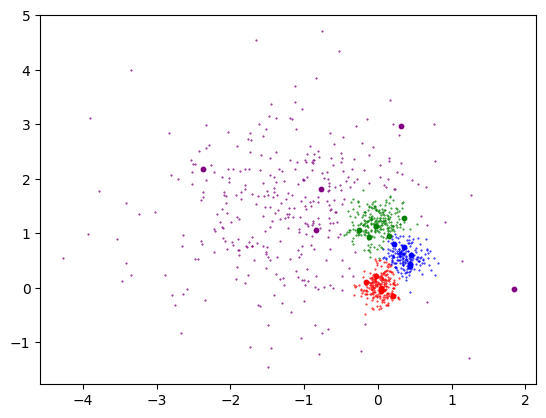

In [18]:

plt.scatter(combined_features[predictions == 0][:,0], combined_features[predictions == 0][:,1], s = 0.2, c="red")
plt.scatter(combined_features[predictions == 1][:,0], combined_features[predictions == 1][:,1], s = 0.2, c="blue")
plt.scatter(combined_features[predictions == 2][:,0], combined_features[predictions == 2][:,1], s = 0.2, c="green")
plt.scatter(combined_features[predictions == 3][:,0], combined_features[predictions == 3][:,1], s = 0.2, c="purple")

#plt.scatter(unsupervised_features[:,0], unsupervised_features[:,1], s = 1, c = "black")
plt.scatter(supervised_features[supervised_labels == 0][:,0], supervised_features[supervised_labels == 0][:,1], s = 10, c = "red", label = "0")
plt.scatter(supervised_features[supervised_labels == 1][:,0], supervised_features[supervised_labels == 1][:,1], s = 10, c = "blue", label = "1")
plt.scatter(supervised_features[supervised_labels == 2][:,0], supervised_features[supervised_labels == 2][:,1], s = 10, c = "green", label = "2")
plt.scatter(supervised_features[supervised_labels == 3][:,0], supervised_features[supervised_labels == 3][:,1], s = 10, c = "purple", label = "3")
plt.show()

looks amazing - changing alpha to a higher number made it exactly how i would segment it if i were to do it by hand.

no need to look at validation set, since i am a human and can easily segment 2d data